In [1]:
# 首先导入包
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision.models as models
# This is for the progress bar.
from tqdm import tqdm
import seaborn as sns
import json

In [2]:
json_path="../garbage_classify_v2/garbage_classify_rule.json"
with open(json_path,'r',encoding='utf8')as fp:
    json_data=json.load(fp)
    print(json_data["0"])

其他垃圾/一次性快餐盒


In [3]:
json_data

{'0': '其他垃圾/一次性快餐盒',
 '1': '其他垃圾/污损塑料',
 '2': '其他垃圾/烟蒂',
 '3': '其他垃圾/牙签',
 '4': '其他垃圾/破碎花盆及碟碗',
 '5': '其他垃圾/竹筷',
 '6': '厨余垃圾/剩饭剩菜',
 '7': '厨余垃圾/大骨头',
 '8': '厨余垃圾/水果果皮',
 '9': '厨余垃圾/水果果肉',
 '10': '厨余垃圾/茶叶渣',
 '11': '厨余垃圾/菜叶菜根',
 '12': '厨余垃圾/蛋壳',
 '13': '厨余垃圾/鱼骨',
 '14': '可回收物/充电宝',
 '15': '可回收物/包',
 '16': '可回收物/化妆品瓶',
 '17': '可回收物/塑料玩具',
 '18': '可回收物/塑料碗盆',
 '19': '可回收物/塑料衣架',
 '20': '可回收物/快递纸袋',
 '21': '可回收物/插头电线',
 '22': '可回收物/旧衣服',
 '23': '可回收物/易拉罐',
 '24': '可回收物/枕头',
 '25': '可回收物/毛绒玩具',
 '26': '可回收物/洗发水瓶',
 '27': '可回收物/玻璃杯',
 '28': '可回收物/皮鞋',
 '29': '可回收物/砧板',
 '30': '可回收物/纸板箱',
 '31': '可回收物/调料瓶',
 '32': '可回收物/酒瓶',
 '33': '可回收物/金属食品罐',
 '34': '可回收物/锅',
 '35': '可回收物/食用油桶',
 '36': '可回收物/饮料瓶',
 '37': '有害垃圾/干电池',
 '38': '有害垃圾/软膏',
 '39': '有害垃圾/过期药物'}

In [4]:
path="../garbage_classify_v2/train_data_v2/"
os.listdir(path)

['img_1.jpg',
 'img_1.txt',
 'img_10.jpg',
 'img_10.txt',
 'img_100.jpg',
 'img_100.txt',
 'img_1000.jpg',
 'img_1000.txt',
 'img_10000.jpg',
 'img_10000.txt',
 'img_10001.jpg',
 'img_10001.txt',
 'img_10002.jpg',
 'img_10002.txt',
 'img_10003.jpg',
 'img_10003.txt',
 'img_10006.jpg',
 'img_10006.txt',
 'img_10007.jpg',
 'img_10007.txt',
 'img_10009.jpg',
 'img_10009.txt',
 'img_1001.jpg',
 'img_1001.txt',
 'img_10010.jpg',
 'img_10010.txt',
 'img_10012.jpg',
 'img_10012.txt',
 'img_10014.jpg',
 'img_10014.txt',
 'img_10015.jpg',
 'img_10015.txt',
 'img_10016.jpg',
 'img_10016.txt',
 'img_10017.jpg',
 'img_10017.txt',
 'img_10018.jpg',
 'img_10018.txt',
 'img_10019.jpg',
 'img_10019.txt',
 'img_1002.jpg',
 'img_1002.txt',
 'img_10020.jpg',
 'img_10020.txt',
 'img_10021.jpg',
 'img_10021.txt',
 'img_10022.jpg',
 'img_10022.txt',
 'img_10023.jpg',
 'img_10023.txt',
 'img_10024.jpg',
 'img_10024.txt',
 'img_10026.jpg',
 'img_10026.txt',
 'img_10028.jpg',
 'img_10028.txt',
 'img_10029.jpg'

In [5]:
def to_dataframe(file_path,json_path):
    """
    将图片和标签转为dataframe格式方面查看分布和图片样例
    """
    combine=os.listdir(file_path)
   
    combine.sort(key=lambda x: int(x.split('.')[0].split('_')[-1]))
    imgs=[]
    labels=[]
    label_explan=[]
    with open(json_path,'r',encoding='utf8')as fp:
        json_data=json.load(fp)
    for item in combine:
        if(item.split('.')[-1]=='jpg'):
            img_path=os.path.join(file_path,item)
            
            
            imgs.append(img_path)
            label_path=os.path.join(file_path,item.split('.')[0]+'.txt')
            with open (label_path,'r') as f:
                label=int(f.read().split(',')[-1])
            label_explan.append(json_data[str(label)])
            labels.append(str(label))
            
    
    df=pd.DataFrame()

    df['img_path']=imgs
    df['label']=labels
    df['label_explain']=label_explan
    
    
    return df

In [6]:
df=to_dataframe(path,json_path)

In [7]:
df.to_csv("garbage_classify_v2.csv")

In [8]:
df.describe()

,img_path,label,label_explain
count,14683,14683,14683
unique,14683,40,40
top,../garbage_classify_v2/train_data_v2/img_1.jpg,11,厨余垃圾/菜叶菜根
freq,1,711,711


In [9]:
df

,img_path,label,label_explain
0,../garbage_classify_v2/train_data_v2/img_1.jpg,0,其他垃圾/一次性快餐盒
1,../garbage_classify_v2/train_data_v2/img_2.jpg,0,其他垃圾/一次性快餐盒
2,../garbage_classify_v2/train_data_v2/img_4.jpg,0,其他垃圾/一次性快餐盒
3,../garbage_classify_v2/train_data_v2/img_5.jpg,0,其他垃圾/一次性快餐盒
4,../garbage_classify_v2/train_data_v2/img_6.jpg,0,其他垃圾/一次性快餐盒
...,...,...,...
14678,../garbage_classify_v2/train_data_v2/img_19728...,39,有害垃圾/过期药物
14679,../garbage_classify_v2/train_data_v2/img_19729...,39,有害垃圾/过期药物
14680,../garbage_classify_v2/train_data_v2/img_19732...,39,有害垃圾/过期药物
14681,../garbage_classify_v2/train_data_v2/img_19733...,39,有害垃圾/过期药物


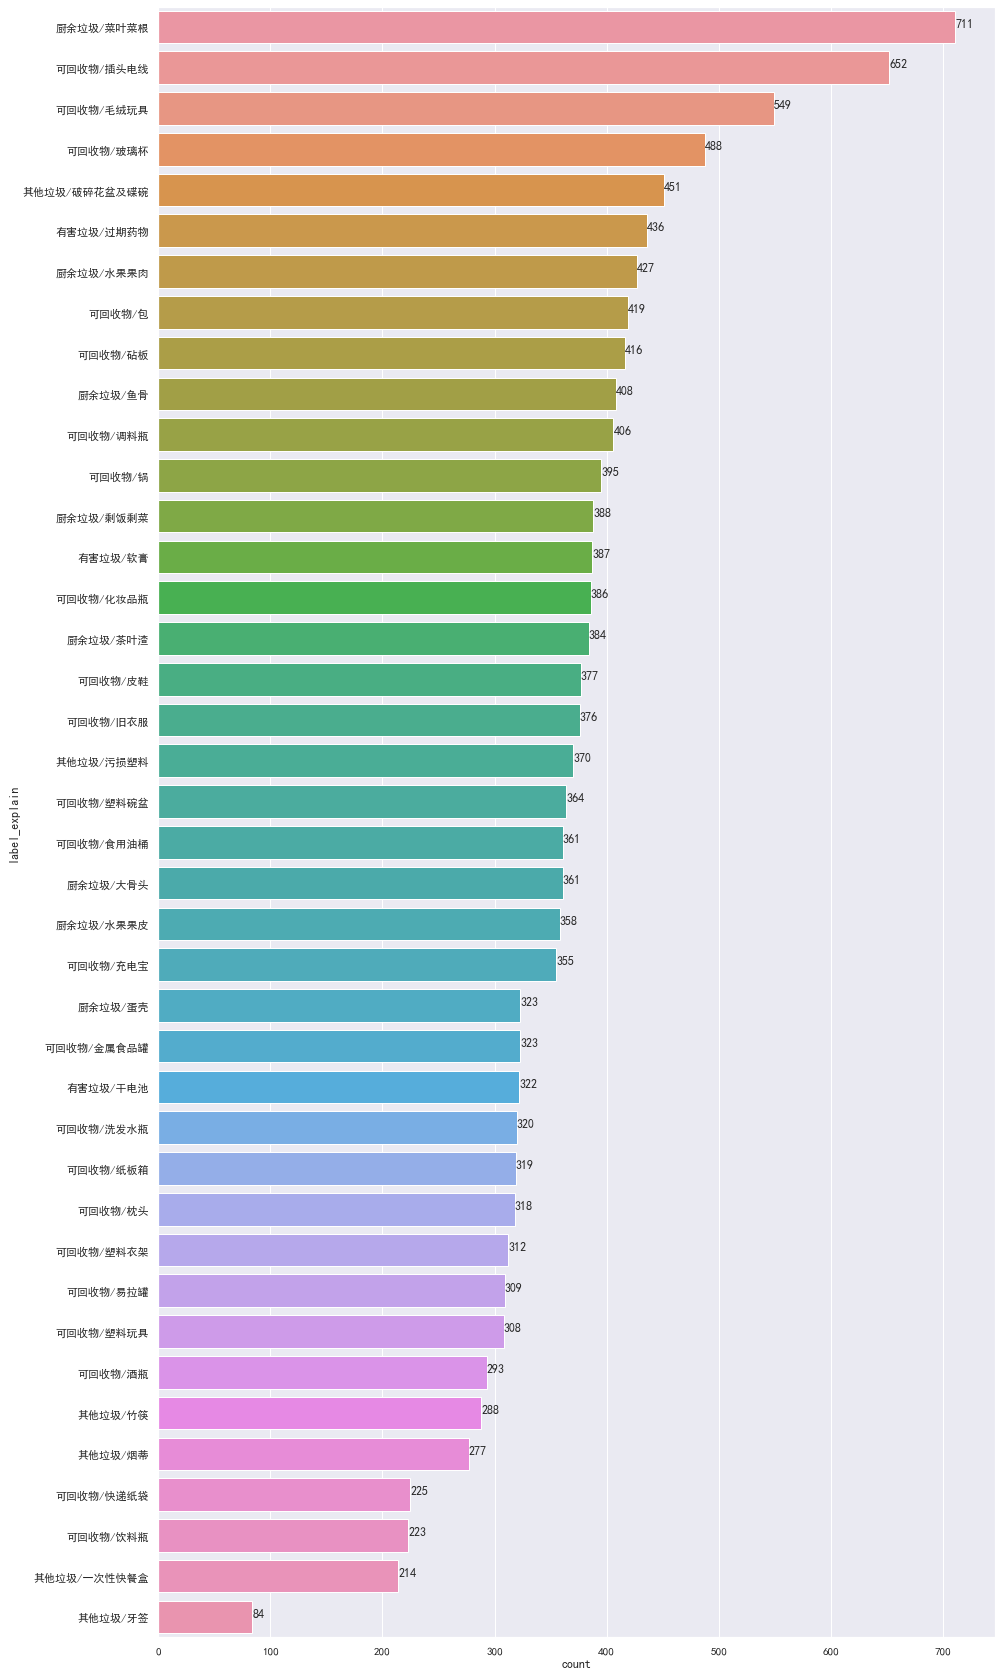

In [10]:
#解决sns无法展示中文
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=15)
sns.set(font=myfont.get_name())

def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top leaves

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=df['label_explain'],order=df['label_explain'].value_counts().index)
barw(ax0)
plt.show()

In [11]:
json_path2="../garbage_classify_et/big_class.json"
with open(json_path2,'r',encoding='utf8')as fp:
    json_data=json.load(fp)
    print(json_data["可回收物"])

0


In [12]:
def big_class(old_df):
    """
    将/前的类合并 构建更粗粒度的分类标签数据集
    """
    json_path2="../garbage_classify_et/big_class.json"
    with open(json_path2,'r',encoding='utf8')as fp:
        json_data=json.load(fp)
    
    old_df['category']=old_df['label_explain'].apply(lambda x:x.split('/')[0])
    old_df['category_label']=old_df['category'].apply(lambda x:json_data[x])
    return old_df

In [13]:
df=big_class(df)

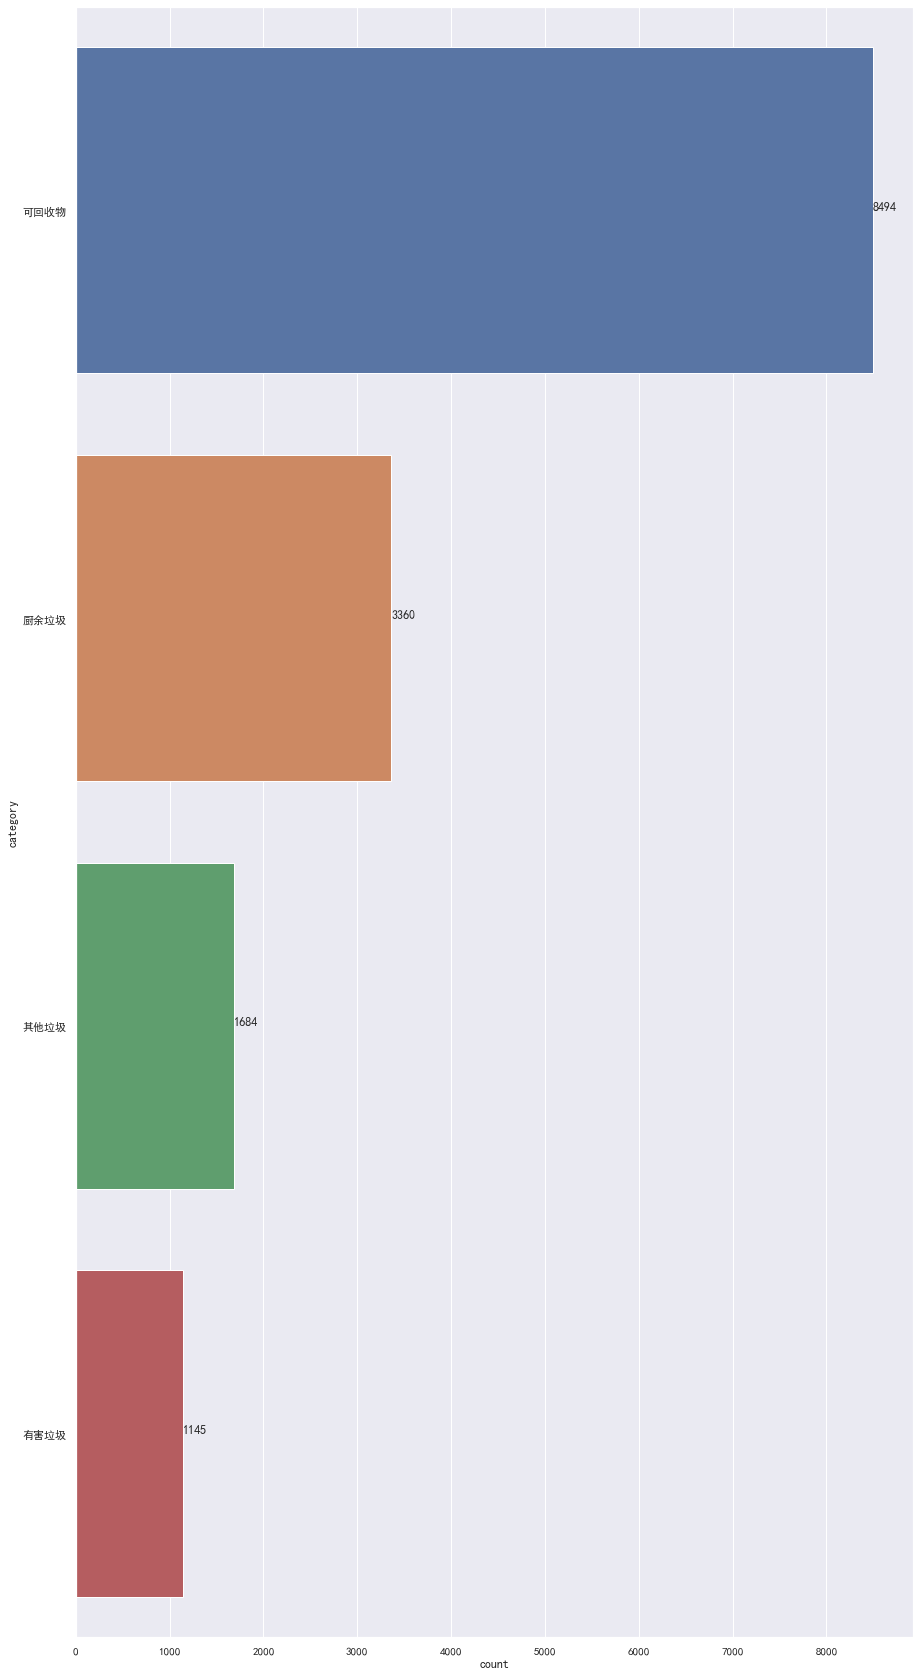

In [14]:
plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=df['category'],order=df['category'].value_counts().index)
barw(ax0)
plt.show()

In [16]:
df.to_csv("garbage_classify_v2.csv")

In [20]:
bg_path="D:/dataset_garb/garbage_bg/"

In [21]:
os.listdir(bg_path)

[]

In [19]:
np.random.choice(os.listdir(bg_path))

'8774-pre.jpg'

In [22]:
df

,img_path,label,label_explain,category,category_label
0,../garbage_classify_v2/train_data_v2/img_1.jpg,0,其他垃圾/一次性快餐盒,其他垃圾,1
1,../garbage_classify_v2/train_data_v2/img_2.jpg,0,其他垃圾/一次性快餐盒,其他垃圾,1
2,../garbage_classify_v2/train_data_v2/img_4.jpg,0,其他垃圾/一次性快餐盒,其他垃圾,1
3,../garbage_classify_v2/train_data_v2/img_5.jpg,0,其他垃圾/一次性快餐盒,其他垃圾,1
4,../garbage_classify_v2/train_data_v2/img_6.jpg,0,其他垃圾/一次性快餐盒,其他垃圾,1
...,...,...,...,...,...
14678,../garbage_classify_v2/train_data_v2/img_19728...,39,有害垃圾/过期药物,有害垃圾,3
14679,../garbage_classify_v2/train_data_v2/img_19729...,39,有害垃圾/过期药物,有害垃圾,3
14680,../garbage_classify_v2/train_data_v2/img_19732...,39,有害垃圾/过期药物,有害垃圾,3
14681,../garbage_classify_v2/train_data_v2/img_19733...,39,有害垃圾/过期药物,有害垃圾,3


In [23]:
df[df['category_label']==0]

,img_path,label,label_explain,category,category_label
3386,../garbage_classify_v2/train_data_v2/img_4558.jpg,18,可回收物/塑料碗盆,可回收物,0
3505,../garbage_classify_v2/train_data_v2/img_4723.jpg,33,可回收物/金属食品罐,可回收物,0
4572,../garbage_classify_v2/train_data_v2/img_6203.jpg,28,可回收物/皮鞋,可回收物,0
4992,../garbage_classify_v2/train_data_v2/img_6733.jpg,14,可回收物/充电宝,可回收物,0
4993,../garbage_classify_v2/train_data_v2/img_6735.jpg,14,可回收物/充电宝,可回收物,0
...,...,...,...,...,...
13533,../garbage_classify_v2/train_data_v2/img_18234...,36,可回收物/饮料瓶,可回收物,0
13872,../garbage_classify_v2/train_data_v2/img_18666...,16,可回收物/化妆品瓶,可回收物,0
13912,../garbage_classify_v2/train_data_v2/img_18712...,16,可回收物/化妆品瓶,可回收物,0
13913,../garbage_classify_v2/train_data_v2/img_18714...,16,可回收物/化妆品瓶,可回收物,0


In [24]:
df[df['category_label']==2]

,img_path,label,label_explain,category,category_label
1621,../garbage_classify_v2/train_data_v2/img_2205.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2
1622,../garbage_classify_v2/train_data_v2/img_2206.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2
1623,../garbage_classify_v2/train_data_v2/img_2208.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2
1624,../garbage_classify_v2/train_data_v2/img_2210.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2
1625,../garbage_classify_v2/train_data_v2/img_2211.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2
...,...,...,...,...,...
4987,../garbage_classify_v2/train_data_v2/img_6727.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2
4988,../garbage_classify_v2/train_data_v2/img_6728.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2
4989,../garbage_classify_v2/train_data_v2/img_6730.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2
4990,../garbage_classify_v2/train_data_v2/img_6731.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2


In [28]:
two=pd.concat([df[df['category_label']==2],df[df['category_label']==0]])

In [43]:
new1=df[df['category_label']==0]

In [44]:
new2=df[df['category_label']==2]

In [47]:
new1['newlabel']=0
new2['newlabel']=1

D:\anaconda3\envs\dbnet\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda3\envs\dbnet\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
new2

,img_path,label,label_explain,category,category_label,newlabel
1621,../garbage_classify_v2/train_data_v2/img_2205.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2,1
1622,../garbage_classify_v2/train_data_v2/img_2206.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2,1
1623,../garbage_classify_v2/train_data_v2/img_2208.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2,1
1624,../garbage_classify_v2/train_data_v2/img_2210.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2,1
1625,../garbage_classify_v2/train_data_v2/img_2211.jpg,6,厨余垃圾/剩饭剩菜,厨余垃圾,2,1
...,...,...,...,...,...,...
4987,../garbage_classify_v2/train_data_v2/img_6727.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1
4988,../garbage_classify_v2/train_data_v2/img_6728.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1
4989,../garbage_classify_v2/train_data_v2/img_6730.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1
4990,../garbage_classify_v2/train_data_v2/img_6731.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1


In [49]:
new1

,img_path,label,label_explain,category,category_label,newlabel
3386,../garbage_classify_v2/train_data_v2/img_4558.jpg,18,可回收物/塑料碗盆,可回收物,0,0
3505,../garbage_classify_v2/train_data_v2/img_4723.jpg,33,可回收物/金属食品罐,可回收物,0,0
4572,../garbage_classify_v2/train_data_v2/img_6203.jpg,28,可回收物/皮鞋,可回收物,0,0
4992,../garbage_classify_v2/train_data_v2/img_6733.jpg,14,可回收物/充电宝,可回收物,0,0
4993,../garbage_classify_v2/train_data_v2/img_6735.jpg,14,可回收物/充电宝,可回收物,0,0
...,...,...,...,...,...,...
13533,../garbage_classify_v2/train_data_v2/img_18234...,36,可回收物/饮料瓶,可回收物,0,0
13872,../garbage_classify_v2/train_data_v2/img_18666...,16,可回收物/化妆品瓶,可回收物,0,0
13912,../garbage_classify_v2/train_data_v2/img_18712...,16,可回收物/化妆品瓶,可回收物,0,0
13913,../garbage_classify_v2/train_data_v2/img_18714...,16,可回收物/化妆品瓶,可回收物,0,0


In [50]:
two=pd.concat([new1,new2])

In [51]:
two

,img_path,label,label_explain,category,category_label,newlabel
3386,../garbage_classify_v2/train_data_v2/img_4558.jpg,18,可回收物/塑料碗盆,可回收物,0,0
3505,../garbage_classify_v2/train_data_v2/img_4723.jpg,33,可回收物/金属食品罐,可回收物,0,0
4572,../garbage_classify_v2/train_data_v2/img_6203.jpg,28,可回收物/皮鞋,可回收物,0,0
4992,../garbage_classify_v2/train_data_v2/img_6733.jpg,14,可回收物/充电宝,可回收物,0,0
4993,../garbage_classify_v2/train_data_v2/img_6735.jpg,14,可回收物/充电宝,可回收物,0,0
...,...,...,...,...,...,...
4987,../garbage_classify_v2/train_data_v2/img_6727.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1
4988,../garbage_classify_v2/train_data_v2/img_6728.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1
4989,../garbage_classify_v2/train_data_v2/img_6730.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1
4990,../garbage_classify_v2/train_data_v2/img_6731.jpg,13,厨余垃圾/鱼骨,厨余垃圾,2,1


In [52]:
two.to_csv("garbage_classify_two.csv")

In [53]:
two['newlabel']

3386    0
3505    0
4572    0
4992    0
4993    0
       ..
4987    1
4988    1
4989    1
4990    1
4991    1
Name: newlabel, Length: 11854, dtype: int64

In [54]:
two = two.sample(frac=1).reset_index(drop=True)

In [55]:
two

,img_path,label,label_explain,category,category_label,newlabel
0,../garbage_classify_v2/train_data_v2/img_8360.jpg,17,可回收物/塑料玩具,可回收物,0,0
1,../garbage_classify_v2/train_data_v2/img_7326.jpg,15,可回收物/包,可回收物,0,0
2,../garbage_classify_v2/train_data_v2/img_16704...,33,可回收物/金属食品罐,可回收物,0,0
3,../garbage_classify_v2/train_data_v2/img_3580.jpg,8,厨余垃圾/水果果皮,厨余垃圾,2,1
4,../garbage_classify_v2/train_data_v2/img_6760.jpg,14,可回收物/充电宝,可回收物,0,0
...,...,...,...,...,...,...
11849,../garbage_classify_v2/train_data_v2/img_7553.jpg,15,可回收物/包,可回收物,0,0
11850,../garbage_classify_v2/train_data_v2/img_7895.jpg,16,可回收物/化妆品瓶,可回收物,0,0
11851,../garbage_classify_v2/train_data_v2/img_12796...,25,可回收物/毛绒玩具,可回收物,0,0
11852,../garbage_classify_v2/train_data_v2/img_7730.jpg,15,可回收物/包,可回收物,0,0


In [58]:
np.array(two['newlabel'], dtype=np.int32)

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
np.array(two.iloc[:,-1], dtype=np.int32)

array([0, 0, 0, ..., 0, 0, 0])